## Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.stats.descriptivestats import describe
from scipy.stats import iqr

## Lectura de datos

In [ ]:
DMark = pd.read_csv("MarketingDirecto.csv")
DMark.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [ ]:
DMark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1000 non-null   object
 1   Genero     1000 non-null   object
 2   Vivienda   1000 non-null   object
 3   Ecivil     1000 non-null   object
 4   Ubicacion  1000 non-null   object
 5   Salario    1000 non-null   int64 
 6   Hijos      1000 non-null   int64 
 7   Historial  697 non-null    object
 8   Catalogos  1000 non-null   int64 
 9   Monto      1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


## Ordenar variables categóricas ordinales

In [ ]:
DMark['Edad'] = pd.Categorical(DMark['Edad'], categories=["Joven", "Media", "Adulta"], ordered=True)
DMark['Historial'] = pd.Categorical(DMark['Historial'], categories=["Bajo", "Medio", "Alto"], ordered=True)

In [ ]:
categorias_edad = pd.Categorical(["Joven", "Media", "Adulta"], ordered=True)
categorias_historial = pd.Categorical(["Bajo", "Medio", "Alto"], ordered=True)

print("Categorías de Edad:", categorias_edad.categories)
print("Categorías de Historial:", categorias_historial.categories)

Categorías de Edad: Index(['Adulta', 'Joven', 'Media'], dtype='object')
Categorías de Historial: Index(['Alto', 'Bajo', 'Medio'], dtype='object')


## 1. Representacion de Datos Cualitativos

### Tabla de Frecuencia

In [ ]:
ni = DMark['Edad'].value_counts() # Frecuencia Absoluta
fi = DMark['Edad'].value_counts(normalize=True) # Frecuencia Relativa
pi = DMark['Edad'].value_counts(normalize=True) * 100 # Porcentaje de Frecuencia Relativa

edad_tabla = pd.concat([ni, fi, pi], axis=1)
edad_tabla.columns = ['ni', 'fi', 'pi']
print(edad_tabla)

         ni     fi    pi
Media   508  0.508  50.8
Joven   287  0.287  28.7
Adulta  205  0.205  20.5


### Gráfico de Barras

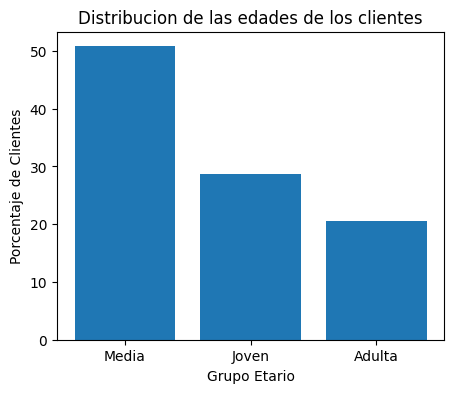

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(pi.index, pi.values)
plt.title('Distribucion de las edades de los clientes')
plt.xlabel('Grupo Etario')
plt.ylabel('Porcentaje de Clientes')
plt.show()

### Gráfico de Sector Circular

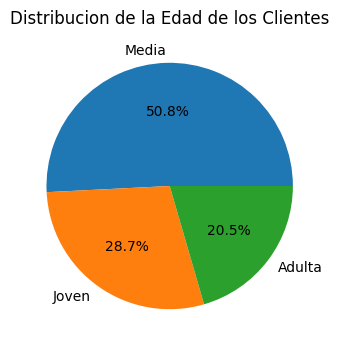

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(pi, labels=pi.index, autopct='%1.1f%%')
plt.title('Distribucion de la Edad de los Clientes')
plt.show()

### Tablas de contingencia

In [ ]:
tabla1 = pd.crosstab(DMark['Edad'], DMark['Historial'])
print(tabla1)

Historial  Bajo  Medio  Alto
Edad                        
Joven       123     35     7
Media        69    127   167
Adulta       38     50    81


### Distribucion condicional

In [ ]:
tabla2 = tabla1.div(tabla1.sum(axis=1), axis=0)
print(tabla2)

Historial      Bajo     Medio      Alto
Edad                                   
Joven      0.745455  0.212121  0.042424
Media      0.190083  0.349862  0.460055
Adulta     0.224852  0.295858  0.479290


### Barras agrupadas

<Figure size 600x400 with 0 Axes>

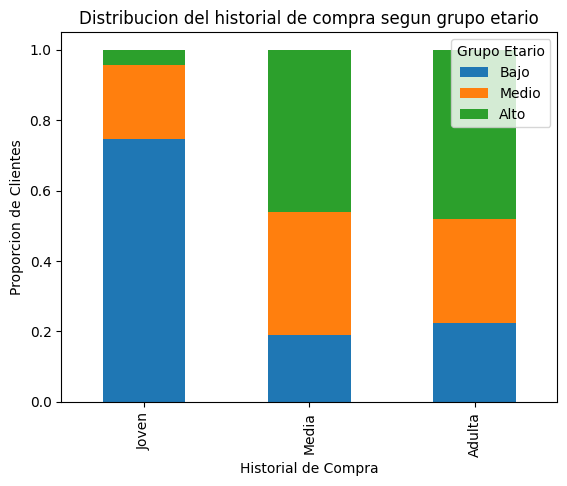

In [ ]:
plt.figure(figsize=(6, 4))
tabla2.plot(kind='bar', stacked=True)
plt.xlabel('Historial de Compra')
plt.ylabel('Proporcion de Clientes')
plt.title('Distribucion del historial de compra segun grupo etario')
plt.legend(title='Grupo Etario')
plt.show()

### Grafico de Mosaico

<Figure size 800x600 with 0 Axes>

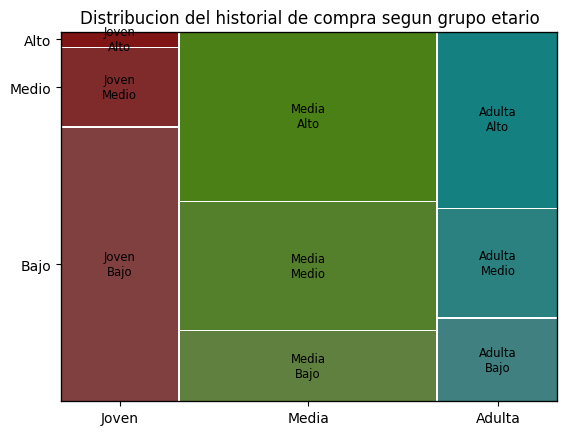

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
# Grafico de Mosaico
plt.figure(figsize=(8, 6))
mosaic(DMark, ['Edad', 'Historial'])
plt.title('Distribucion del historial de compra segun grupo etario')
plt.show()

## 2. Representacion de Datos Cuantitativos Discretos

### Tabla de Frecuencias

In [ ]:
ni = DMark['Hijos'].value_counts()
fi = DMark['Hijos'].value_counts(normalize=True)
pi = DMark['Hijos'].value_counts(normalize=True) * 100
hijos_tabla = pd.concat([ni, fi, pi], axis=1)
hijos_tabla.columns = ['ni', 'fi', 'pi']
print(hijos_tabla)

    ni     fi    pi
0  462  0.462  46.2
1  267  0.267  26.7
2  146  0.146  14.6
3  125  0.125  12.5


### Gráfico de Barras

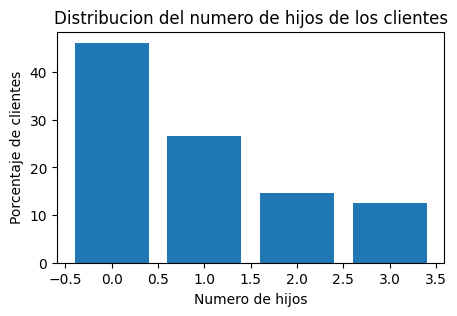

In [ ]:
plt.figure(figsize=(5, 3))
plt.bar(pi.index, pi.values)
plt.title('Distribucion del numero de hijos de los clientes')
plt.xlabel('Numero de hijos')
plt.ylabel('Porcentaje de clientes')
plt.show()

## 3. Representacion de Datos Cuantitativos Continuos

### Tabla de Frecuencias

In [ ]:
factorx = pd.cut(DMark['Monto'], bins=np.histogram_bin_edges(DMark['Monto'], bins='sturges'), right=True)
xout = pd.DataFrame(factorx.value_counts()).reset_index()
xout.columns = ['Monto', 'ni']
xout['fi'] = xout['ni'] / xout['ni'].sum()
xout['pi'] = xout['fi'] * 100
xout['Ni'] = xout['ni'].cumsum()
xout['Fi'] = xout['fi'].cumsum()
xout['Pi'] = xout['pi'].cumsum()
print(xout)

                   Monto   ni        fi         pi   Ni        Fi          Pi
0        (38.0, 599.727]  321  0.321321  32.132132  321  0.321321   32.132132
1    (599.727, 1161.455]  255  0.255255  25.525526  576  0.576577   57.657658
2   (1161.455, 1723.182]  186  0.186186  18.618619  762  0.762763   76.276276
3   (1723.182, 2284.909]  101  0.101101  10.110110  863  0.863864   86.386386
4   (2284.909, 2846.636]   74  0.074074   7.407407  937  0.937938   93.793794
5   (2846.636, 3408.364]   34  0.034034   3.403403  971  0.971972   97.197197
6   (3408.364, 3970.091]   14  0.014014   1.401401  985  0.985986   98.598599
7   (3970.091, 4531.818]    4  0.004004   0.400400  989  0.989990   98.998999
8   (5093.545, 5655.273]    4  0.004004   0.400400  993  0.993994   99.399399
9   (4531.818, 5093.545]    3  0.003003   0.300300  996  0.996997   99.699700
10    (5655.273, 6217.0]    3  0.003003   0.300300  999  1.000000  100.000000


### Histograma y poligono de frecuencia

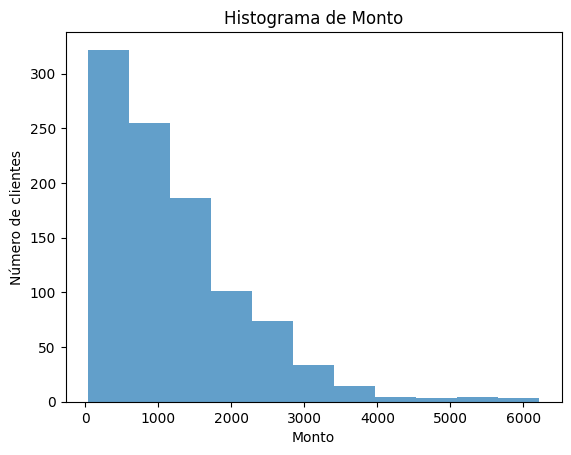

In [ ]:
plt.hist(DMark['Monto'], bins='sturges', alpha=0.7)
plt.xlabel('Monto')
plt.ylabel('Número de clientes')
plt.title('Histograma de Monto')
plt.show()

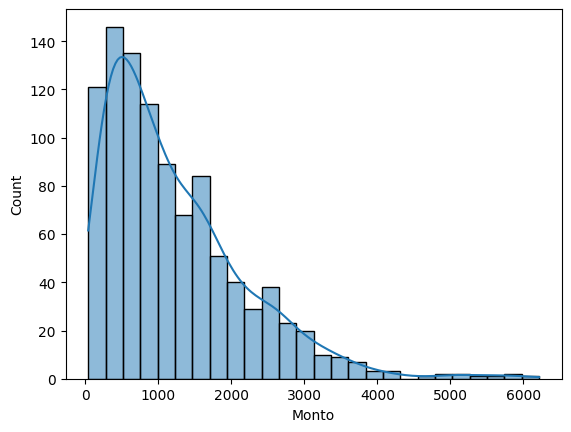

In [ ]:
sns.histplot(DMark['Monto'], kde=True)
plt.show()

### Comparación de histogramas

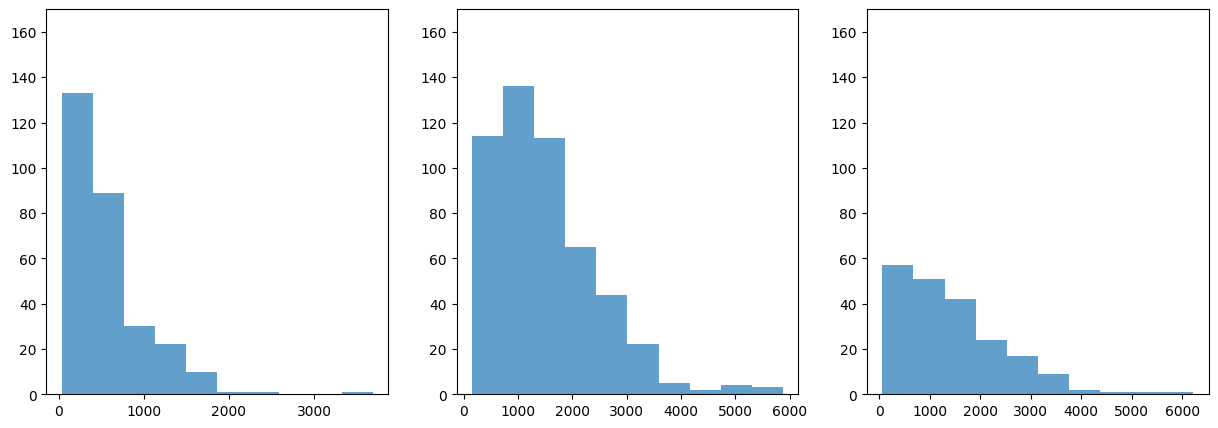

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(DMark['Monto'][DMark['Edad'] == 'Joven'], alpha=0.7)
plt.ylim(0, 170)
plt.subplot(1, 3, 2)
plt.hist(DMark['Monto'][DMark['Edad'] == 'Media'], alpha=0.7)
plt.ylim(0, 170)
plt.subplot(1, 3, 3)
plt.hist(DMark['Monto'][DMark['Edad'] == 'Adulta'], alpha=0.7)
plt.ylim(0, 170)
plt.show()

### Tallo y Hojas

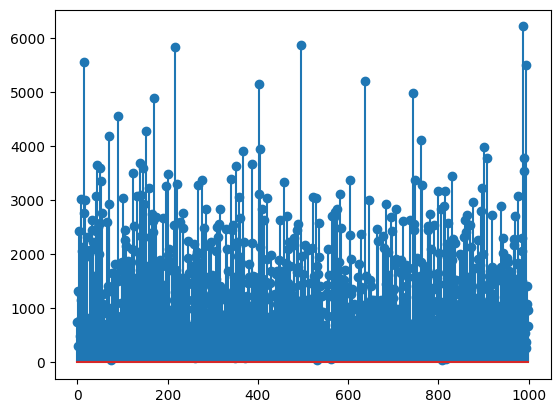

In [ ]:
plt.stem(DMark['Monto'])
plt.show()

### Comparativo de Tallo y Hojas

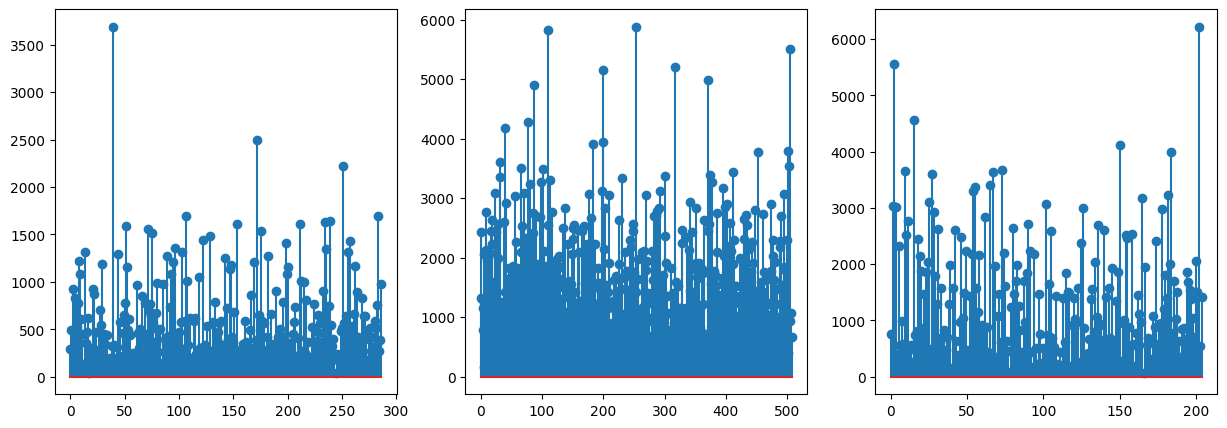

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.stem(DMark['Monto'][DMark['Edad'] == 'Joven'])
plt.subplot(1, 3, 2)
plt.stem(DMark['Monto'][DMark['Edad'] == 'Media'])
plt.subplot(1, 3, 3)
plt.stem(DMark['Monto'][DMark['Edad'] == 'Adulta'])
plt.show()

### Ojiva

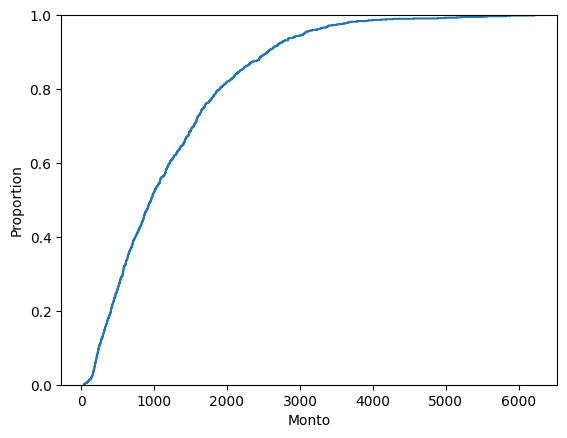

In [ ]:
sns.ecdfplot(data=DMark, x='Monto')
plt.show()

### Histograma y Densidad

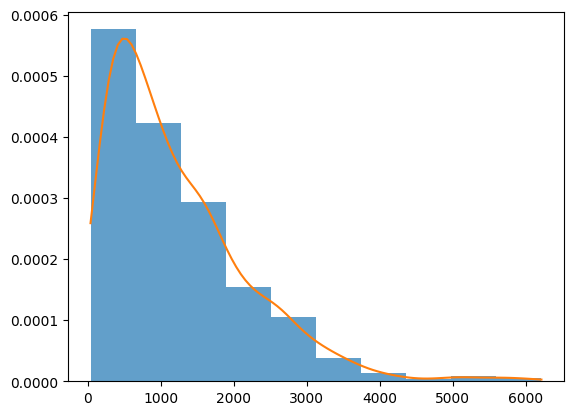

In [ ]:
from scipy import stats
plt.hist(DMark['Monto'], density=True, alpha=0.7)
plt.plot(np.linspace(min(DMark['Monto']), max(DMark['Monto']), 100),
         stats.gaussian_kde(DMark['Monto']).pdf(np.linspace(min(DMark['Monto']), max(DMark['Monto']), 100)))
plt.show()

### Grafico de densidad

<ipython-input-62-fa85b71ca034>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=DMark['Monto'], shade=True)


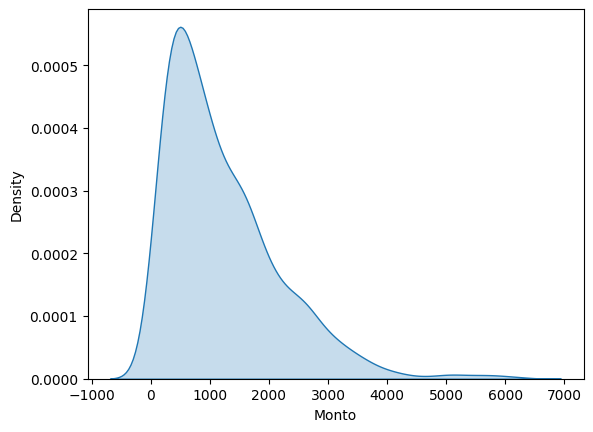

In [ ]:
sns.kdeplot(data=DMark['Monto'], shade=True)
plt.show()

### Boxplots

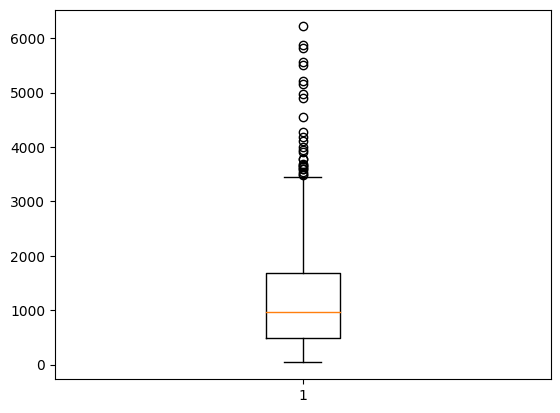

In [ ]:
plt.boxplot(DMark['Monto'])
plt.show()

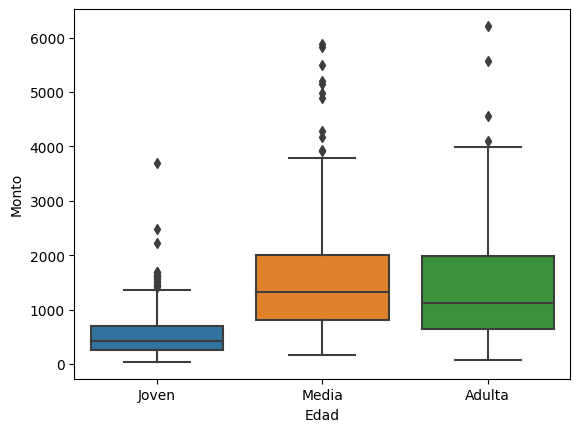

In [ ]:
sns.boxplot(x=DMark['Edad'], y=DMark['Monto'])
plt.show()

### Análisis descriptivo

In [ ]:
me = np.mean(DMark['Monto'])
med = np.median(DMark['Monto'])
q1 = np.percentile(DMark['Monto'], 25)
q3 = np.percentile(DMark['Monto'], 75)
r = np.ptp(DMark['Monto'])
ric = iqr(DMark['Monto'])
s = np.std(DMark['Monto'])
cv = (np.std(DMark['Monto']) / np.mean(DMark['Monto'])) * 100
as3 = (3 * (np.mean(DMark['Monto']) - np.median(DMark['Monto']))) / np.std(DMark['Monto'])

resumen = pd.DataFrame({
    'Valor': [me, med, q1, q3, r, ric, s, cv, as3]
}, index=['Media', 'Mediana', 'Q1', 'Q3', 'Rango', 'Rango Intercuartil', 'Desviación Estándar', 'Coeficiente de Variación', 'Asimetría'])
print(resumen)

                                Valor
Media                     1216.770000
Mediana                    962.000000
Q1                         488.250000
Q3                        1688.500000
Rango                     6179.000000
Rango Intercuartil        1200.250000
Desviación Estándar        960.587958
Coeficiente de Variación    78.945730
Asimetría                    0.795669


### Otras funciones de resumen

In [ ]:
print(describe(DMark['Monto']))

                          Monto
nobs               1.000000e+03
missing            0.000000e+00
mean               1.216770e+03
std_err            3.039166e+01
upper_ci           1.276337e+03
lower_ci           1.157203e+03
std                9.610686e+02
iqr                1.200250e+03
iqr_normal         8.897467e+02
mad                7.453535e+02
mad_normal         9.341621e+02
coef_var           7.898523e-01
range              6.179000e+03
max                6.217000e+03
min                3.800000e+01
skew               1.467072e+00
kurtosis           5.953272e+00
jarque_bera        7.221258e+02
jarque_bera_pval  1.557344e-157
mode               5.760000e+02
mode_freq          4.000000e-03
median             9.620000e+02
1%                 1.059900e+02
5%                 1.879000e+02
10%                2.429000e+02
25%                4.882500e+02
50%                9.620000e+02
75%                1.688500e+03
90%                2.551400e+03
95%                3.052550e+03
99%     

In [ ]:
print(DMark['Monto'].describe())

count    1000.000000
mean     1216.770000
std       961.068613
min        38.000000
25%       488.250000
50%       962.000000
75%      1688.500000
max      6217.000000
Name: Monto, dtype: float64


In [ ]:
print(skew(DMark['Monto']))

1.467072077727945


In [ ]:
print(kurtosis(DMark['Monto']))

2.9532721208097037


### Análisis descriptivo comparativo

In [ ]:
resumen_ecivil = DMark.groupby('Ecivil')['Monto'].agg(['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75),
                                                       lambda x: x.max() - x.min(), lambda x: x.quantile(0.75) - x.quantile(0.25),
                                                       'std', lambda x: (x.std() / x.mean()) * 100, lambda x: 3 * (x.mean() - x.median()) / x.std()])
print(resumen_ecivil)



                mean  median  <lambda_0>  <lambda_1>  <lambda_2>  <lambda_3>  \
Ecivil                                                                         
Casado   1672.069721  1515.0      864.75     2246.00        6124     1381.25   
Soltero   757.813253   576.0      322.50     1011.25        4144      688.75   

                 std  <lambda_4>  <lambda_5>  
Ecivil                                        
Casado   1037.680857   62.059664    0.454098  
Soltero   592.200792   78.146006    0.921039  


### Boxplot comparativo

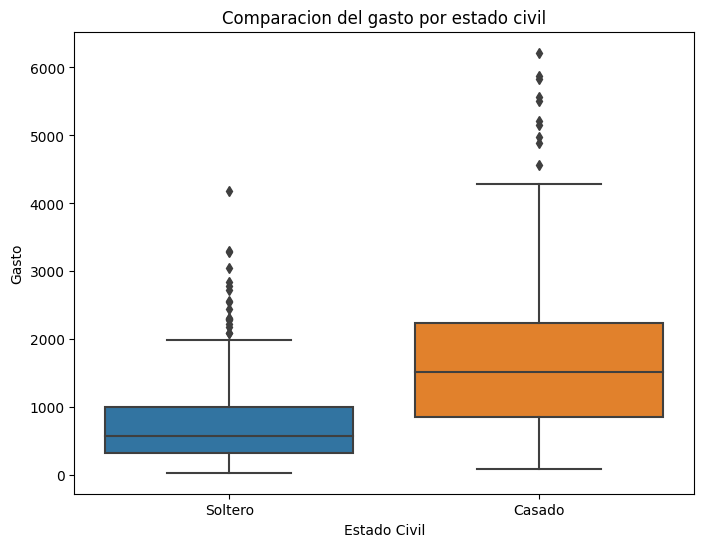

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ecivil', y='Monto', data=DMark)
plt.xlabel('Estado Civil')
plt.ylabel('Gasto')
plt.title('Comparacion del gasto por estado civil')
plt.show()

### Asociacion

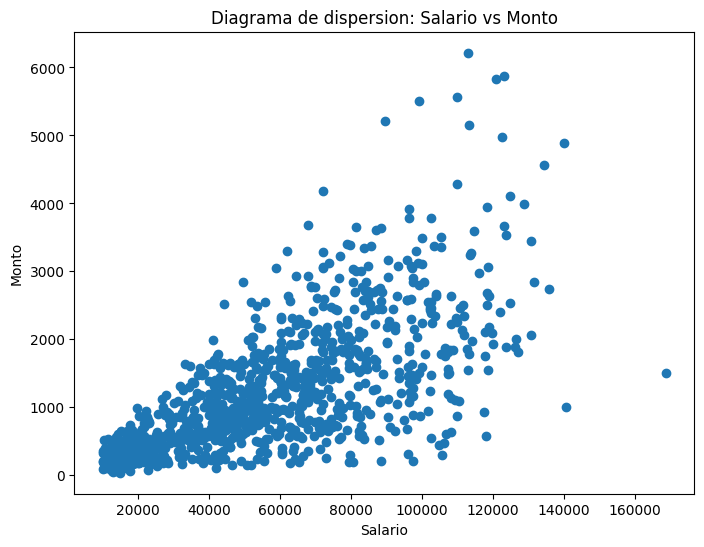

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(DMark['Salario'], DMark['Monto'])
plt.xlabel('Salario')
plt.ylabel('Monto')
plt.title('Diagrama de dispersion: Salario vs Monto')
plt.show()

### Matriz de Diagramas de dispersión

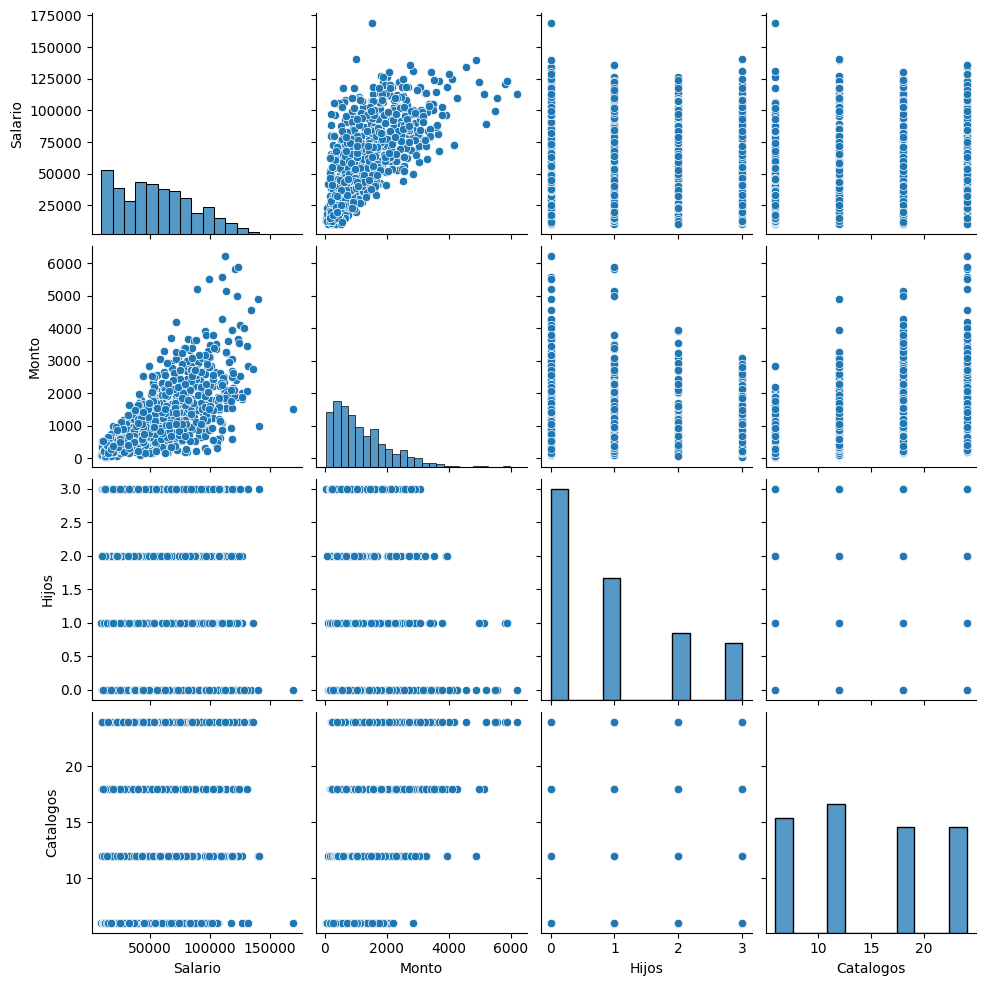

In [ ]:
sns.pairplot(data=DMark[['Salario', 'Monto', 'Hijos', 'Catalogos']])
plt.show()

### Coeficiente de correlación

In [ ]:
correlation_matrix = DMark[['Salario', 'Hijos', 'Catalogos', 'Monto']].corr()
print(correlation_matrix)

            Salario     Hijos  Catalogos     Monto
Salario    1.000000  0.049663   0.183551  0.699596
Hijos      0.049663  1.000000  -0.113455 -0.222308
Catalogos  0.183551 -0.113455   1.000000  0.472650
Monto      0.699596 -0.222308   0.472650  1.000000


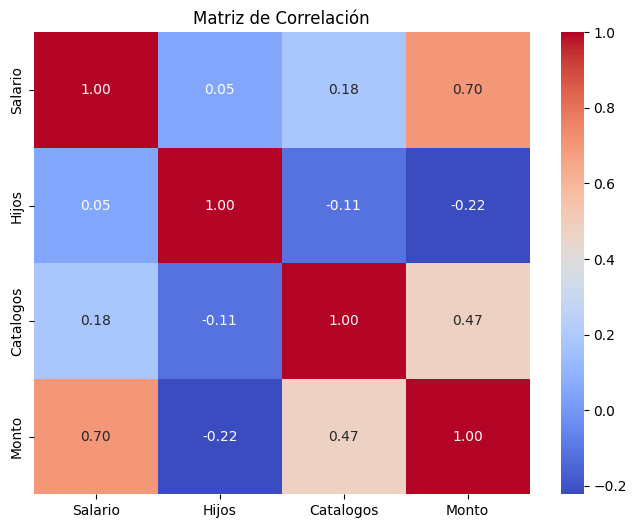

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()